### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 


## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Интеллектуальный анализ данных



##### Студент:  Липатникова Марина
##### Группа:   НФИбд-02-19



## Москва 2022
***


#### Задание на лабораторную работу №3



Для закрепленного за Вами варианта лабораторной работы:

    1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

    2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

    3.	Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять. 

    4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

    5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

    6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

    7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

    8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 





# Индивидуальное задание



Лабораторная работа 3 – Вариант 2 

Adult Data Set 

Название файла: adult.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/adult 

Первый признак: age (столбец No 1) 

Второй признак: hours-per-week (столбец No 13) 

Класс: >50K, <=50K (столбец No 16) 

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: F-мера 

1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

In [1]:

url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/adult/adult.data"


In [2]:

import pandas as pd

data = pd.read_csv(url, header=None)
data.columns = ['age', 'workclass', 
                'fnlwgt', 'education',
                'education-num', 'marital-status', 
                'occupation', 'relationship',
                'race', 'sex','capital-gain',
                'capital-loss','hours-per-week', 'native-country',
                '>50K, <=50K']
data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:

data.drop(data.columns.difference(['age','hours-per-week','>50K, <=50K']), axis=1, inplace=True) 
data


,age,hours-per-week,">50K, <=50K"
0,39,40,<=50K
1,50,13,<=50K
2,38,40,<=50K
3,53,40,<=50K
4,28,40,<=50K
...,...,...,...
32556,27,38,<=50K
32557,40,40,>50K
32558,58,40,<=50K
32559,22,20,<=50K


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

В датасете используется знак "?" для пропущенных значений.

In [4]:

import numpy as np


In [5]:

data = data.replace('?', np.nan)


In [6]:

data.isnull().sum(axis=0)


age               0
hours-per-week    0
>50K, <=50K       0
dtype: int64

3.	Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять. 

Всего уникальных меток класса 2.

In [7]:

data['>50K, <=50K'].describe()


count      32561
unique         2
top        <=50K
freq       24720
Name: >50K, <=50K, dtype: object

4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [8]:

data_m = data.copy()
data_m = data_m.loc[data_m['>50K, <=50K'] != ' <=50K'] # отбираю значения для класса >50K
data_m


,age,hours-per-week,">50K, <=50K"
7,52,45,>50K
8,31,50,>50K
9,42,40,>50K
10,37,80,>50K
11,30,40,>50K
...,...,...,...
32539,71,10,>50K
32545,39,20,>50K
32554,53,40,>50K
32557,40,40,>50K


In [9]:

data_l = data.copy()
data_l = data_l.loc[data_l['>50K, <=50K'] == ' <=50K'] # отбираю значения для класса <=50K
data_l


,age,hours-per-week,">50K, <=50K"
0,39,40,<=50K
1,50,13,<=50K
2,38,40,<=50K
3,53,40,<=50K
4,28,40,<=50K
...,...,...,...
32553,32,11,<=50K
32555,22,40,<=50K
32556,27,38,<=50K
32558,58,40,<=50K


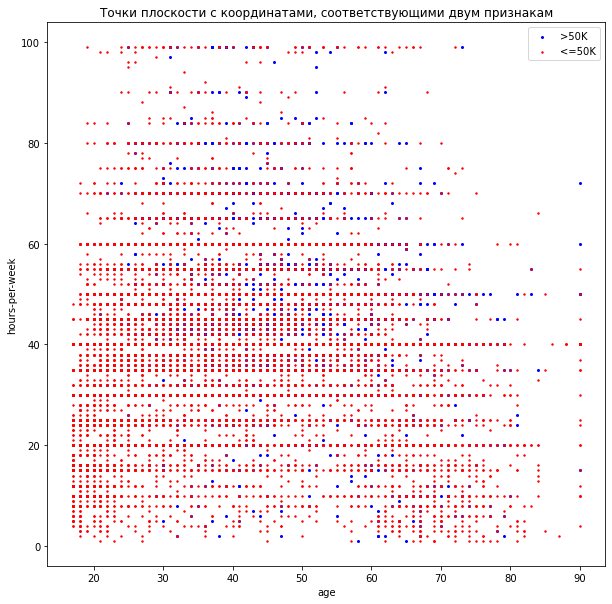

In [10]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# сортирую признаки
X1 = data_m['age'].values
Y1 = data_m['hours-per-week'].values
X2 = data_l['age'].values
Y2 = data_l['hours-per-week'].values
# подписываю оси и рисунок
plt.title("Точки плоскости с координатами, соответствующими двум признакам")
plt.xlabel('age')
plt.ylabel('hours-per-week')

# рисую
plt.scatter(X1, Y1, color='blue', s=4, marker='o')
plt.scatter(X2, Y2, color='red', s=2, marker='o')
#легенда
plt.legend(labels=('>50K','<=50K'))
plt.show()


5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

In [11]:

data_pr = data.copy()


In [12]:

data_pr = data_pr.drop(['>50K, <=50K'],axis=1)
data_pr


,age,hours-per-week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


In [13]:

list = data_pr.values.tolist()
list


[[39, 40],
 [50, 13],
 [38, 40],
 [53, 40],
 [28, 40],
 [37, 40],
 [49, 16],
 [52, 45],
 [31, 50],
 [42, 40],
 [37, 80],
 [30, 40],
 [23, 30],
 [32, 50],
 [40, 40],
 [34, 45],
 [25, 35],
 [32, 40],
 [38, 50],
 [43, 45],
 [40, 60],
 [54, 20],
 [35, 40],
 [43, 40],
 [59, 40],
 [56, 40],
 [19, 40],
 [54, 60],
 [39, 80],
 [49, 40],
 [23, 52],
 [20, 44],
 [45, 40],
 [30, 40],
 [22, 15],
 [48, 40],
 [21, 40],
 [19, 25],
 [31, 38],
 [48, 40],
 [31, 43],
 [53, 40],
 [24, 50],
 [49, 40],
 [25, 35],
 [57, 40],
 [53, 38],
 [44, 40],
 [41, 40],
 [29, 43],
 [25, 40],
 [18, 30],
 [47, 60],
 [50, 55],
 [47, 60],
 [43, 40],
 [46, 40],
 [35, 40],
 [41, 48],
 [30, 40],
 [30, 40],
 [32, 40],
 [48, 40],
 [42, 45],
 [29, 58],
 [36, 40],
 [28, 40],
 [53, 40],
 [49, 50],
 [25, 40],
 [19, 32],
 [31, 40],
 [29, 70],
 [23, 40],
 [79, 20],
 [27, 40],
 [40, 40],
 [67, 2],
 [18, 22],
 [31, 40],
 [18, 30],
 [52, 40],
 [46, 40],
 [59, 48],
 [44, 40],
 [53, 35],
 [49, 40],
 [33, 50],
 [30, 40],
 [43, 50],
 [57, 40],


In [14]:

pr = np.array(list)
pr


array([[39, 40],
       [50, 13],
       [38, 40],
       ...,
       [58, 40],
       [22, 20],
       [52, 40]])

K-means

In [15]:

def plot_cluster(X,y):
    # визуализация кластеров 
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        # индексы строк для данного кластера 
        row_ix = np.where(y == cluster)
        # диаграмма рассеяния для кластера
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=20)
    plt.grid(True)
    

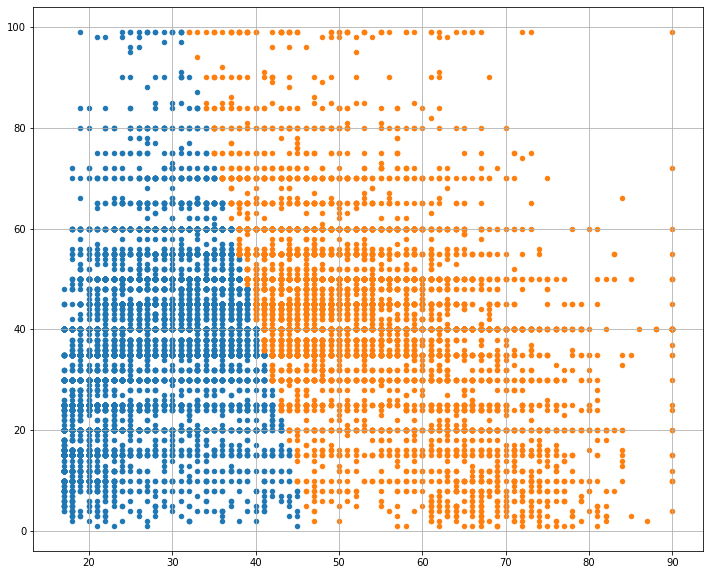

In [16]:

# кластеризация k-means 
from sklearn.cluster import KMeans

# модель
model = KMeans(n_clusters=2)

# тренируем модель
model.fit(pr)

# присваиваем метку каждой точке набора
yhat = model.predict(pr)

plot_cluster(pr,yhat)


Agglomerative Clustering

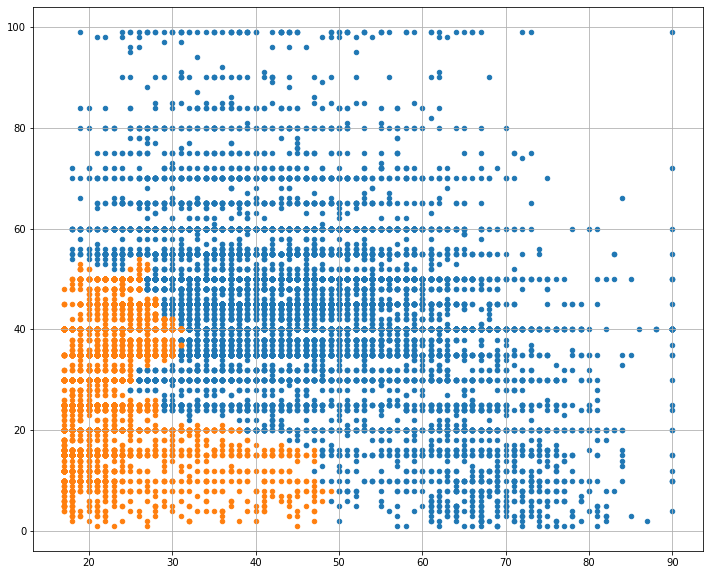

In [17]:

# иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering

# модель иерархической кластеризации, расстояние между кластерами методом Ward
model1 = AgglomerativeClustering(n_clusters=2)

# тренируем модель и присваиваем метку каждой точке набора
yhat1 = model1.fit_predict(pr)

plot_cluster(pr,yhat1)


DBSCAN

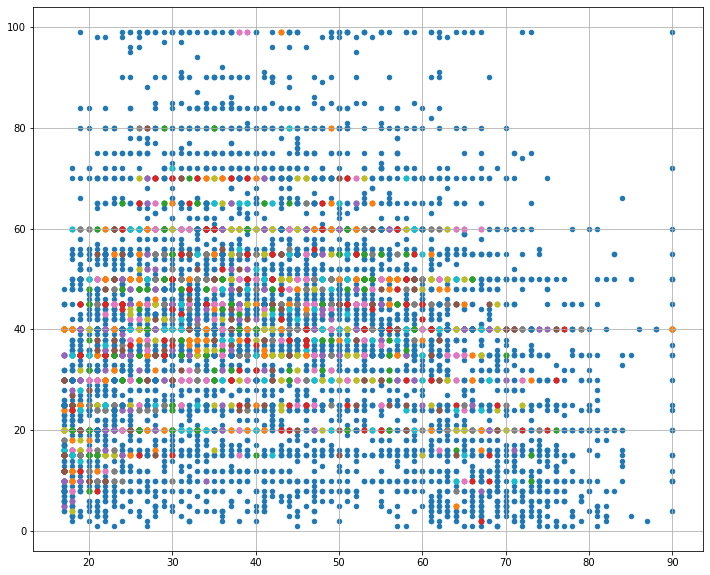

In [18]:

# кластеризация dbscan 
from sklearn.cluster import DBSCAN

# модель
model2 = DBSCAN(eps=0.20, min_samples=5)

# тренируем модель и присваиваем метку каждой точке набора
yhat2 = model2.fit_predict(pr)

plot_cluster(pr,yhat2)


Gaussian Mixture Model 

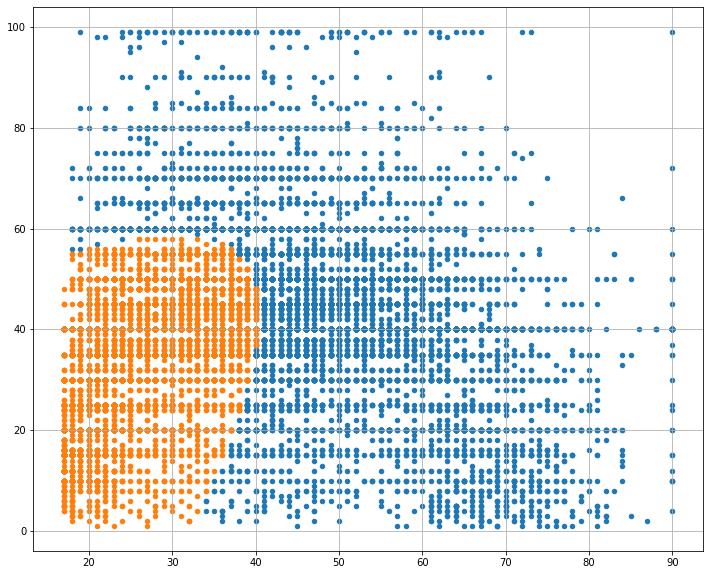

In [19]:
# кластеризация при помощи гауссовских смесей
from sklearn.mixture import GaussianMixture

# модель
model3 = GaussianMixture(n_components=2)

# тренируем модель
model3.fit(pr)

# присваиваем метку каждой точке набора
yhat3 = model3.predict(pr)

plot_cluster(pr,yhat3)


6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

Для F-меры меняю буквенные обозначения классов на численные.

In [20]:

cl = data.copy()
list1 = cl.values.tolist()
list1
cls = []
for i in list1:
    cls.append(i[2])
cls = np.array(cls)
cls


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [21]:

c = data.copy()
c = c['>50K, <=50K'].replace(' <=50K', 1)
c = c.replace(' >50K', 2)
c


0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    2
32558    1
32559    1
32560    2
Name: >50K, <=50K, Length: 32561, dtype: int64

In [22]:

cl = np.array(c)
cl


array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

Матрицы сопряженности:

K-means

In [23]:

from sklearn.metrics.cluster import contingency_matrix

matrix = contingency_matrix(cl, model.labels_)
matrix


array([[15785,  8935],
       [ 2780,  5061]], dtype=int64)

Agglomerative Clustering

In [24]:


matrix1 = contingency_matrix(cl, model1.labels_)
matrix1


array([[15307,  9413],
       [ 7288,   553]], dtype=int64)

DBSCAN

In [25]:


matrix2 = contingency_matrix(cl, model2.labels_)
matrix2


array([[2425,  296,  283, ...,    3,    2,    4],
       [ 673,  101,  112, ...,    2,    3,    1]], dtype=int64)

Gaussian Mixture Model

In [26]:

matrix3 = contingency_matrix(cl, yhat3)
matrix3


array([[ 9891, 14829],
       [ 5320,  2521]], dtype=int64)

F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Функция для меры TP

In [27]:

def TP_f(m):
    TP = 0
    count = 0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            count += 1
            TP += pow(m[i][j], 2)
    TP = (TP - count) / 2
    print(TP)
    return TP


In [28]:

#K-means
TP = TP_f(matrix)


181171283.5


In [29]:

#Agglomerative Clustering
TP1 = TP_f(matrix1)


188164783.5


In [30]:

#DBSCAN 
TP2 = TP_f(matrix2)


5225030.5


In [31]:

#Gaussian Mixture Model 
TP3 = TP_f(matrix3)


176194479.5


Функция для меры FN

In [32]:

def FN_f(matrix):
    FN = 0
    n_i = 0
    for i in range(matrix.shape[0]):
        n_i += pow(np.sum(matrix[i]), 2)
        for j in range(matrix.shape[1]):
            FN += pow(matrix[i][j], 2)
    FN = (n_i - FN) / 2
    print(FN)
    return FN


In [33]:

#K-means
FN = FN_f(matrix)


155108555.0


In [34]:

#Agglomerative Clustering
FN1 = FN_f(matrix1)


148115055.0


In [35]:

#DBSCAN 
FN2 = FN_f(matrix2)


331053975.0


In [36]:

#Gaussian Mixture Model 
FN3 = FN_f(matrix3)


160085359.0


Функция для меры FP

In [37]:

def FP_f(matrix):
    FP = 0
    m_j = np.sum(matrix, axis = 0)
    m_j = pow(m_j, 2)
    m_j = np.sum(m_j)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            FP += pow(matrix[i][j], 2)
    FP = (m_j - FP) / 2
    print(FP)
    return FP


In [38]:

#K-means
FP = FP_f(matrix)


89102335.0


In [39]:

#Agglomerative Clustering
FP1 = FP_f(matrix1)


116762805.0


In [40]:

#DBSCAN 
FP2 = FP_f(matrix2)


2498516.0


In [41]:

#Gaussian Mixture Model 
FP3 = FP_f(matrix3)


90004029.0


Функция для меры TN

In [42]:

def TN_f(matrix):
    TN = 0
    m_j = np.sum(matrix, axis = 0)
    m_j = pow(m_j, 2)
    m_j = np.sum(m_j)
    n_i = np.sum(matrix, axis = 1)
    n_i = pow(n_i, 2)
    n_i = np.sum(n_i)
    count = 0
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            count += 1
            TN += pow(matrix[i][j], 2)
    TN = (count * count - n_i - m_j + TN) / 2
    print(TN)
    return TN


In [43]:

#K-means
TN = TN_f(matrix)


-425382167.5


In [44]:

#Agglomerative Clustering
TN1 = TN_f(matrix1)


-453042637.5


In [45]:

#DBSCAN 
TN2 = TN_f(matrix2)


-337383906.5


In [46]:

#Gaussian Mixture Model 
TN3 = TN_f(matrix3)


-426283861.5


Индекс Жаккара

In [47]:

def Ind_J(TP, FP, FN):
    J = TP / (TP + FP + FN)
    print(J)
    

In [48]:

#K-means
J = Ind_J(TP, FP, FN)


0.42590238798523605


In [49]:

#Agglomerative Clustering
J1 = Ind_J(TP1, FP1, FN1)


0.4153357000708036


In [50]:

#DBSCAN 
J2 = Ind_J(TP2, FP2, FN2)


0.015423191234368836


In [51]:

#Gaussian Mixture Model 
J3 = Ind_J(TP3, FP3, FN3)


0.4133266420174815


F-мера

In [52]:

#K-means
from sklearn.metrics import f1_score
f = f1_score(cl, model.labels_, average=None)
print(f)
np.average(f)


[0.         0.46156628 0.        ]


0.15385542583600237

In [53]:

#Agglomerative Clustering
f1 = f1_score(cl, model1.labels_, average=None)
print(f1)
np.average(f1)


[0.       0.542755 0.      ]


0.1809183340060351

In [54]:

#DBSCAN 
f2 = f1_score(cl, model2.labels_, average=None)
print(f2)
print()
print("{:f}".format(np.average(f2)))


[0.         0.         0.02253633 0.02055728 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [55]:

#Gaussian Mixture Model 
f3 = f1_score(cl, yhat3, average=None)
print(f3)
np.average(f3)


[0.         0.70496791 0.        ]


0.23498930354171624

7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

Очевидно, что оптимальным по F-мере является Gaussian Mixture Model.

8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

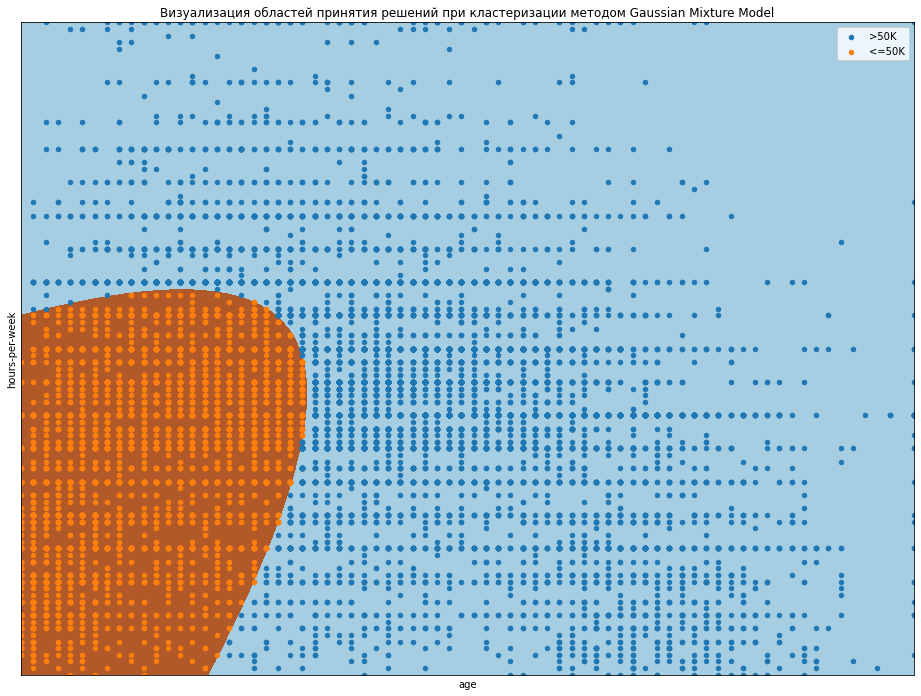

In [56]:

# в Gaussian Mixture Model нет ф-ции cluster_centers_
h = 0.02  


x_min, x_max = pr[:, 0].min(), pr[:, 0].max()
y_min, y_max = pr[:, 1].min(), pr[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,12))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

clusters = np.unique(yhat3)
for cluster in clusters: 
    row_ix = np.where(yhat3 == cluster)
    plt.scatter(pr[row_ix, 0], pr[row_ix, 1],s=20)

plt.title("Визуализация областей принятия решений при кластеризации методом Gaussian Mixture Model")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.legend(labels=('>50K','<=50K'))

